In [1]:
from astropy.table import Table
from astropy.table import Column
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Import gz2 data as a table
filename = "GZ Data\zoo2MainSpecz_no_large_int.fits" # Table 5
gz2_data = Table.read(filename, format="fits")
print(gz2_data.info)

<Table masked=True length=243500>
                             name                              dtype 
------------------------------------------------------------- -------
                                                           ra float32
                                                          dec float32
                                                     rastring bytes11
                                                    decstring bytes11
                                                       sample bytes20
                                                     gz2class bytes20
                                        total_classifications   int16
                                                  total_votes   int16
                      t01_smooth_or_features_a01_smooth_count   int16
                     t01_smooth_or_features_a01_smooth_weight float32
                   t01_smooth_or_features_a01_smooth_fraction float32
          t01_smooth_or_features_a01_smooth_weighted_fra

In [2]:
# Filter out debiased merger fraction only
merger_debiased = Table([gz2_data["t08_odd_feature_a24_merger_debiased"]])
merger_debiased["t08_odd_feature_a24_merger_debiased"].name = "Merger Fraction Debiased"
merger_debiased.info

<Table masked=True length=243500>
          name            dtype 
------------------------ -------
Merger Fraction Debiased float32

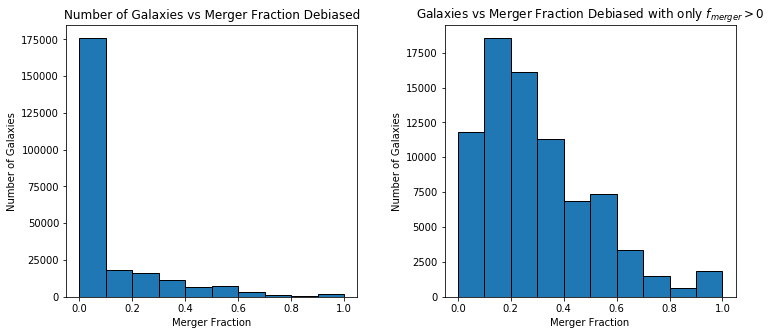

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Plot histogram of entire gz2 data merger fraction
ax[0].hist(merger_debiased["Merger Fraction Debiased"],  bins=10, range=(0,1), edgecolor="black")
ax[0].set_xlabel("Merger Fraction")
ax[0].set_ylabel("Number of Galaxies")
ax[0].set_title("Number of Galaxies vs Merger Fraction Debiased")

# Plot historgram of gz2 data with non zero merger fraction
merger_debiased_nonzero = merger_debiased[merger_debiased["Merger Fraction Debiased"] > 0]
ax[1].hist(merger_debiased_nonzero["Merger Fraction Debiased"], bins=10, range=(0,1), edgecolor="black")
ax[1].set_xlabel("Merger Fraction")
ax[1].set_ylabel("Number of Galaxies")
ax[1].set_title("Galaxies vs Merger Fraction Debiased with only $f_{merger} > 0$")
fig.subplots_adjust(wspace=0.3)

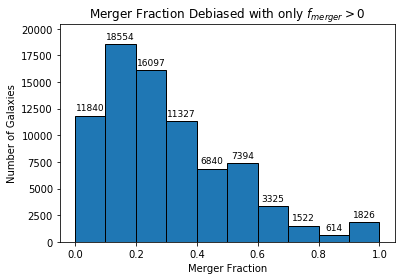

In [4]:
# Plot same second graph as above with labels for number of galaxies in bin
num_of_bins = 10
fig2 = plt.hist(merger_debiased_nonzero["Merger Fraction Debiased"], bins=num_of_bins, range=(0,1), edgecolor="black")
plt.xlabel("Merger Fraction")
plt.ylabel("Number of Galaxies")
plt.title("Merger Fraction Debiased with only $f_{merger} > 0$")
plt.ylim(0, max(fig2[0])*1.1)
for i in range(num_of_bins):
    plt.text((fig2[1][i] + fig2[1][i+1]) / 2,fig2[0][i]+500,str(int(fig2[0][i])), fontsize=9, ha='center')
plt.show()

In [5]:
# Resample data for only galaxies which have merger_flag = 1, and that have a minimum number of merger votes

# greater_than_1 = gz2_data[gz2_data["t08_odd_feature_a24_merger_count"] > 1]
# mergers = greater_than_1[greater_than_1["t08_odd_feature_a24_merger_debiased"] == 1]

# mergers = gz2_data[gz2_data["t08_odd_feature_a24_merger_flag"] == 1]
mergers = Table(gz2_data)
mergers = mergers[mergers["t08_odd_feature_a24_merger_count"] >= 10]
print(len(mergers))

9158


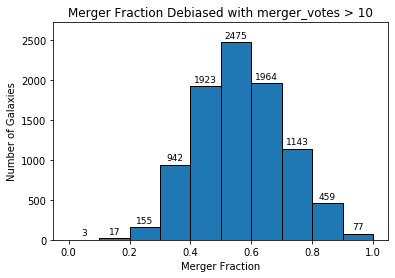

In [6]:
num_of_bins = 10
fig3 = plt.hist(mergers["t08_odd_feature_a24_merger_debiased"], bins=num_of_bins, range=(0,1), edgecolor="black")
plt.xlabel("Merger Fraction")
plt.ylabel("Number of Galaxies")
plt.title("Merger Fraction Debiased with merger_votes > 10")
plt.ylim(0, max(fig3[0])*1.1)
for i in range(num_of_bins):
    plt.text((fig3[1][i] + fig3[1][i+1]) / 2,fig3[0][i]+50,str(int(fig3[0][i])), fontsize=9, ha='center')
plt.show()

http://skyservice.pha.jhu.edu/DR7/ImgCutout/getjpeg.aspx?ra=190.84396&dec=37.64945&scale=0.39612&width=400&height=400&opt=&query=


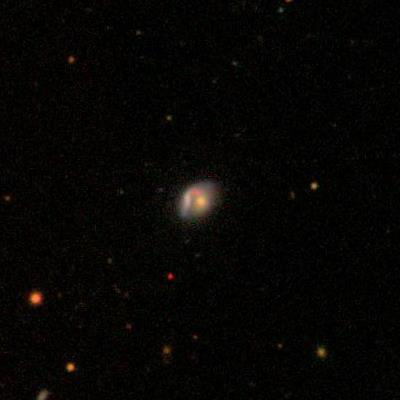

In [9]:
import random

mergers_index = random.randint(0, len(mergers))

url1 = "http://skyservice.pha.jhu.edu/DR7/ImgCutout/getjpeg.aspx?ra="
ra = mergers["ra"][mergers_index]
url2 = "&dec="
dec = mergers["dec"][mergers_index]
url3 = "&scale=0.39612&width=400&height=400&opt=&query="
url = url1 + str(ra) + url2 + str(dec) + url3
print(url)

import urllib.request
from PIL import Image
image = Image.open(urllib.request.urlopen(url))
image